## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**



In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import cv2


In [4]:
im =  cv2.imread('pic5.jpg') #Reads an image into BGR Format

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)


(518, 538, 3)


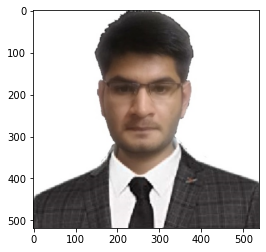

In [37]:
plt.imshow(im) # as RGB Format
plt.show()

In [38]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(278684, 3)


In [39]:
from sklearn.cluster import KMeans

In [40]:
dominant_colors = 5

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)


KMeans(n_clusters=5)

In [89]:
centers = km.cluster_centers_

In [90]:
centers = np.array(centers,dtype='uint8')

In [91]:
print(centers)

[[253 253 253]
 [129 101  84]
 [ 37  34  33]
 [184 153 136]
 [ 66  59  58]]


### Plot what all colors are these ?

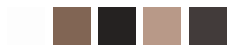

In [101]:
i = 1

plt.figure(0,figsize=(8,2))


colors = []

for each_col in centers:
    plt.subplot(1,10,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100, 100, 3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()


## Segmenting Our Original Image

In [102]:
new_img = np.zeros((278684,3),dtype='uint8')

print(new_img.shape)


(278684, 3)


In [103]:
colors

[array([253, 253, 253], dtype=uint8),
 array([129, 101,  84], dtype=uint8),
 array([37, 34, 33], dtype=uint8),
 array([184, 153, 136], dtype=uint8),
 array([66, 59, 58], dtype=uint8)]

In [104]:
km.labels_

array([0, 0, 0, ..., 4, 4, 4])

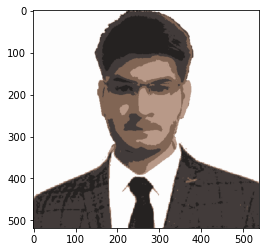

In [88]:

for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()
    
    


In [ ]:
# changing colors by changing centers

In [98]:
2colors

[array([66, 59, 58], dtype=uint8),
 array([253, 253, 253], dtype=uint8),
 array([255, 225, 199], dtype=uint8),
 array([37, 34, 33], dtype=uint8),
 array([242, 188, 141], dtype=uint8)]

In [105]:
# 6,8,9

242, 188, 141

255, 225, 199


(255, 225, 199)

In [106]:
new_img = np.zeros((278684,3),dtype='uint8')

print(new_img.shape)

(278684, 3)


In [107]:
# colors[5]=np.array([255, 218, 179],dtype="uint8")
colors[1]=np.array([242, 188, 141],dtype="uint8")
colors[3]=np.array([255, 225, 199],dtype="uint8")


In [108]:
colors

[array([253, 253, 253], dtype=uint8),
 array([242, 188, 141], dtype=uint8),
 array([37, 34, 33], dtype=uint8),
 array([255, 225, 199], dtype=uint8),
 array([66, 59, 58], dtype=uint8)]

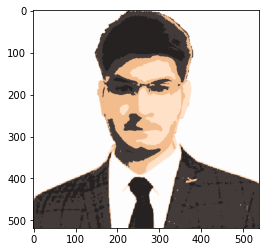

In [109]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()
    
    

In [118]:
import matplotlib as mp
mp.image.imsave('dsh6.jpg',new_img)